# Проект: Линейные модели в машинном обучении

## Описание проекта

Фермер, стремясь расширить свое стадо коров, заключил выгодный контракт с пастбищем "ЭкоФерма", что позволяет ему тщательно отбирать новых коров. Для принятия объективного решения о покупке, он использует строгую методику оценки качества молока и должен соответствовать плану развития хозяйства. Чтобы помочь фермеру управлять рисками, **необходимо разработать модель машинного обучения**, которая будет поддерживать его в этом процессе, что и является ключевой целью исследования.

Исследвание предполагает составить 2 модели для прогноза: 
- Возможный удой коровы
- Вероятность получить вкусное молоко

Доступные данные:
Файл ```ferma_main.csv``` - информация о стаде фермера:
 - id — уникальный идентификатор коровы.
 - Удой, кг — масса молока, которую корова даёт в год (в килограммах).
 - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
 - Сырой протеин, г — содержание сырого протеина в корме (в граммах).
 - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Жирность,% — содержание жиров в молоке (в процентах).
 - Белок,% — содержание белков в молоке (в процентах).
 - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
 
Файл ```ferma_dad.csv``` - имена отцов коров из стада фермера: 
 - id — уникальный идентификатор коровы.
 - Имя Папы — имя папы коровы.
 
Файл ```cow_buy.csv``` - данные с "ЭкоФерма" :
 - Порода — порода коровы.
 - Тип пастбища — ландшафт лугов, на которых паслась корова.
 - порода папы_быка — порода папы коровы.
 - Имя_папы — имя папы коровы.
 - Текущая_жирность,% — содержание жиров в молоке (в процентах).
 - Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## Загрузка данных

In [1]:
!pip install scikit-learn==1.4.0 

import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error,
                            accuracy_score, precision_score, recall_score, confusion_matrix)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
#читаем датасеты
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

In [3]:
ferma_main.sample(3)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
340,341,5497,"14,7",1751,"0,84",Вис Бик Айдиал,Равнинное,Айдиал,"3,18","3,074",не вкусно,менее_2_лет
297,298,6336,"14,9",1665,"0,93",РефлешнСоверинг,Холмистое,Айдиал,"3,64","3,075",не вкусно,более_2_лет
266,267,6169,"15,4",1717,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,63","3,074",вкусно,более_2_лет


In [4]:
#переименуем столбцы
ferma_main.columns = ['id', 'yield', 'ecu', 'crude_protein', 'psr', 'breed', 'pasture_type', 'father_breed',
                     'fat', 'protein', 'flavor', 'age']
ferma_main.sample(3)

,id,yield,ecu,crude_protein,psr,breed,pasture_type,father_breed,fat,protein,flavor,age
242,243,6122,"15,7",2237,"0,94",Вис Бик Айдиал,Холмистое,Соверин,"3,71","3,077",вкусно,более_2_лет
516,517,5650,"11,9",2200,"0,85",Вис Бик Айдиал,Холмистое,Айдиал,"3,23","3,079",вкусно,более_2_лет
31,32,6674,"14,4",1994,"0,93",РефлешнСоверинг,Холмистое,Айдиалл,"3,71","3,073",не вкусно,более_2_лет


In [5]:
ferma_dad.sample(3)

,id,Имя Папы
553,554,Барин
607,608,Соловчик
18,19,Соловчик


In [6]:
#переименуем столбцы
ferma_dad.columns = ['id', 'father_name']
ferma_dad.sample(3)

,id,father_name
320,321,Буйный
448,449,Буйный
624,625,Буйный


In [7]:
cow_buy.sample(3)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет


In [8]:
#переименуем столбцы
cow_buy.columns = ['breed', 'pasture_type', 'father_breed', 'father_name', 'current_fat',
                   'current_protein', 'age']
cow_buy.sample(3)

,breed,pasture_type,father_breed,father_name,current_fat,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет


Итог загрузки данных:

- Загружены данные
- Обратим внимание, что все данные дробного формата записаны через запятую, а не через точку 
- В каждом датафрейме переименованы столбцы на **латиницу** и под единый удобочитаемый формат:

  - id -> id (без изменений)
  - Удой, кг -> yield
  - ЭКЕ (Энергетическая кормовая единица) -> ecu
  - Сырой протеин, г -> crude_protein
  - СПО (Сахаро-протеиновое соотношение) -> spr
  - Порода -> breed
  - Тип пастбища -> pasture_type
  - порода папы_быка -> father_breed
  - Жирность % -> fat
  - Белок % -> protein
  - Вкус молока -> flavor
  - Возраст -> age
  - Имя папы -> father_name
  - Текущая_жирность,% ->current_fat
  - Текущий_уровень_белок,% - > current_protein


##  Предобработка данных

In [9]:
#создадим функцию для проверки данных в датафреймах
def df_info(df):
    print(df.info())
    print()
    print(f"Количество очевидных дубликатов = {df.duplicated().sum()}")
    print()
    print(f"Количество пропусков = {df.isna().sum()}")
    
#создадим фукнцию для замены запятой на точку и перевод тип данных в дробный формат
def comma_to_float(df, column):
    df[column] = df[column].str.replace(',', '.')
    df[column] = df[column].astype('float')

###  Стадо фермера

In [10]:
df_info(ferma_main)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             634 non-null    int64 
 1   yield          634 non-null    int64 
 2   ecu            634 non-null    object
 3   crude_protein  634 non-null    int64 
 4   psr            634 non-null    object
 5   breed          634 non-null    object
 6   pasture_type   634 non-null    object
 7   father_breed   634 non-null    object
 8   fat            634 non-null    object
 9   protein        634 non-null    object
 10  flavor         634 non-null    object
 11  age            634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB
None

Количество очевидных дубликатов = 5

Количество пропусков = id               0
yield            0
ecu              0
crude_protein    0
psr              0
breed            0
pasture_type     0
father_breed     0
fat              0
prote

Данные в относительно хорошем состоянии. Необходимо удалить дубликаты и привести все данные под корректные типы

In [11]:
#проверим неочевидные дубли в категориальных столбцах
print(f"Породы = {ferma_main['breed'].unique()}")
print()
print(f"Пастбища = {ferma_main['pasture_type'].unique()}")
print()
print(f"Порода отца = {ferma_main['father_breed'].unique()}")
print()
print(f"Вкус = {ferma_main['flavor'].unique()}")

Породы = ['Вис Бик Айдиал' 'РефлешнСоверинг']

Пастбища = ['Равнинное' 'Равнинные' 'Холмистое']

Порода отца = ['Айдиал' 'Соверин' 'Айдиалл']

Вкус = ['вкусно' 'не вкусно']


В столбцах с пастбищами и породой отца есть одинаковые, но по-разному написанные данные, приведем все в один формат

In [12]:
#приведем в один формат похожие названия в столбцах
ferma_main['pasture_type'] = ferma_main['pasture_type'].str.replace('Равнинные', 'Равнинное')
ferma_main['father_breed'] = ferma_main['father_breed'].str.replace('Айдиалл', 'Айдиал')

In [13]:
#переведем в оптимальные типы данные в столбцах
comma_to_float(ferma_main, 'ecu')
comma_to_float(ferma_main, 'psr')
comma_to_float(ferma_main, 'fat')
comma_to_float(ferma_main, 'protein')

#удаляем дубликаты
ferma_main = ferma_main.drop_duplicates().reset_index()

ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          629 non-null    int64  
 1   id             629 non-null    int64  
 2   yield          629 non-null    int64  
 3   ecu            629 non-null    float64
 4   crude_protein  629 non-null    int64  
 5   psr            629 non-null    float64
 6   breed          629 non-null    object 
 7   pasture_type   629 non-null    object 
 8   father_breed   629 non-null    object 
 9   fat            629 non-null    float64
 10  protein        629 non-null    float64
 11  flavor         629 non-null    object 
 12  age            629 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 64.0+ KB


###  Имена пап быков в стаде фермера

In [14]:
df_info(ferma_dad)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           629 non-null    int64 
 1   father_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
None

Количество очевидных дубликатов = 0

Количество пропусков = id             0
father_name    0
dtype: int64


In [15]:
ferma_dad['father_name'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

С данными все в порядке

###  Данные с "ЭкоФермы"

In [16]:
df_info(cow_buy)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   breed            20 non-null     object
 1   pasture_type     20 non-null     object
 2   father_breed     20 non-null     object
 3   father_name      20 non-null     object
 4   current_fat      20 non-null     object
 5   current_protein  20 non-null     object
 6   age              20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
None

Количество очевидных дубликатов = 4

Количество пропусков = breed              0
pasture_type       0
father_breed       0
father_name        0
current_fat        0
current_protein    0
age                0
dtype: int64


In [17]:
print(f"Породы = {cow_buy['breed'].unique()}")
print()
print(f"Пастбища = {cow_buy['pasture_type'].unique()}")
print()
print(f"Порода отца = {cow_buy['father_breed'].unique()}")
print()
print(f"Имя отца = {cow_buy['father_name'].unique()}")

Породы = ['Вис Бик Айдиал' 'РефлешнСоверинг']

Пастбища = ['холмистое' 'равнинное']

Порода отца = ['Айдиал' 'Соверин']

Имя отца = ['Геркулес' 'Буйный' 'Барин' 'Соловчик']


Для коррекной работы в столбце с патсбищами заменим первый буквы на заглавные

In [18]:
#В ferma_main пастбища с заглавной буквы, сделаем и сдесь
cow_buy['pasture_type'] = cow_buy['pasture_type'].replace('равнинное', 'Равнинное')
cow_buy['pasture_type'] = cow_buy['pasture_type'].replace('холмистое', 'Холмистое')

comma_to_float(cow_buy, 'current_fat')
comma_to_float(cow_buy, 'current_protein')

cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   pasture_type     20 non-null     object 
 2   father_breed     20 non-null     object 
 3   father_name      20 non-null     object 
 4   current_fat      20 non-null     float64
 5   current_protein  20 non-null     float64
 6   age              20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


Итог предобработки данных:
 - пропусков в данных не обнаружено
 - удалены очевидные дубликаты
 - удалены неявные дубликаты
 - первые строчные буквы в данных заменены на заглавные
 - заменены точки на запятые в дробных данных и заменены на тип float64

## Исследовательский анализ данных

### Стадо фермера

In [19]:
ferma_main.sample(3)

,index,id,yield,ecu,crude_protein,psr,breed,pasture_type,father_breed,fat,protein,flavor,age
251,251,252,5846,14.3,1756,0.88,РефлешнСоверинг,Равнинное,Соверин,3.63,3.072,не вкусно,более_2_лет
235,235,236,6470,16.7,2341,0.95,Вис Бик Айдиал,Холмистое,Соверин,3.73,3.081,вкусно,более_2_лет
47,47,48,6561,15.8,1932,0.93,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.074,не вкусно,более_2_лет


#### Количественные показатели

In [20]:
#посмотрим на количественные данные
ferma_main.describe()

,index,id,yield,ecu,crude_protein,psr,fat,protein
count,629.00000,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,314.00000,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,0.00000,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,157.00000,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,314.00000,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,471.00000,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,628.00000,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Заметим странные максимальный показатель удоя - аномально большое значение

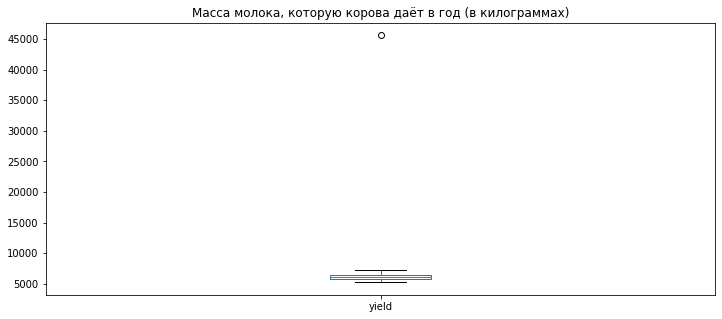

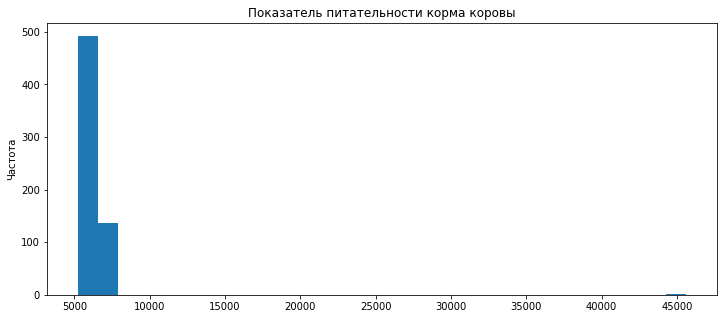

In [21]:
#посмотрим на все количественные показатели более детально
ferma_main['yield'].plot(kind='box', figsize = (12,5))
plt.title('Масса молока, которую корова даёт в год (в килограммах)')
plt.show()
ferma_main['yield'].plot(kind='hist', bins=30, figsize = (12,5))
plt.title('Показатель питательности корма коровы')
plt.ylabel('Частота')
plt.show()

Показатель удоя 45616 - всего один. Очевидный выброс, предлагаю избавиться

In [22]:
ferma_main = ferma_main[ferma_main['yield'] != 45616]

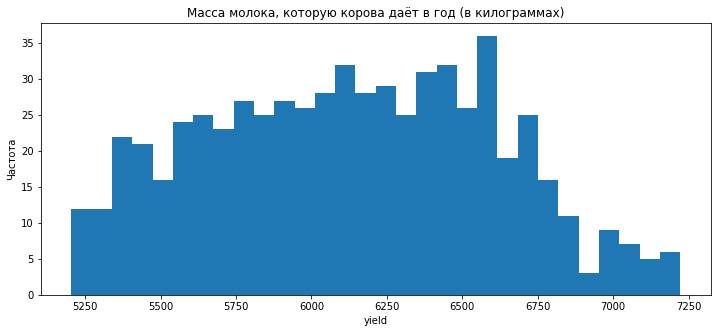

In [23]:
ferma_main['yield'].plot(kind='hist', bins=30, figsize = (12,5))
plt.title('Масса молока, которую корова даёт в год (в килограммах)')
plt.xlabel('yield')
plt.ylabel('Частота')
plt.show()

Показатели удоя распределены ненормально нормально, значения расположены с ~5 до ~7 тонн

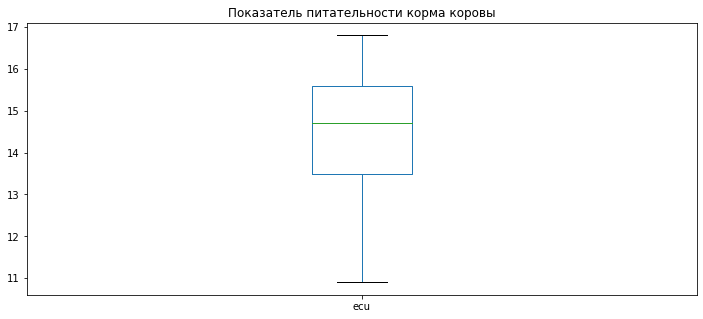

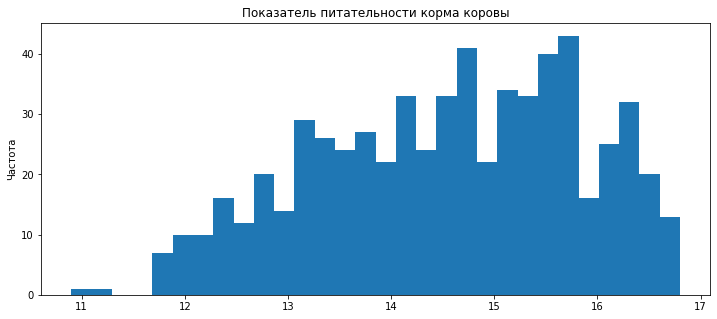

In [24]:
ferma_main['ecu'].plot(kind='box', figsize = (12,5))
plt.title('Показатель питательности корма коровы')
plt.show()
ferma_main['ecu'].plot(kind='hist', bins=30, figsize = (12,5))
plt.title('Показатель питательности корма коровы')
plt.ylabel('Частота')
plt.show()

С данными все в порядке, данные расположены в диапазоне с ~11 до ~16.5

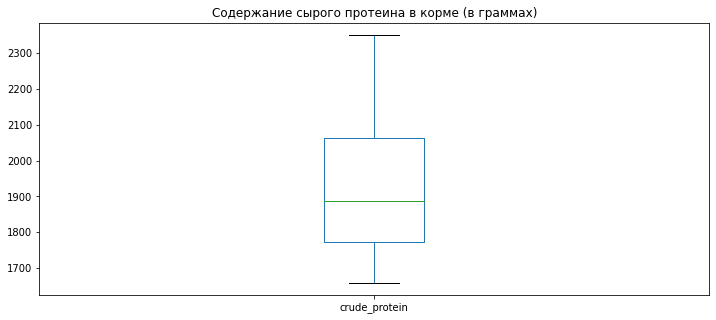

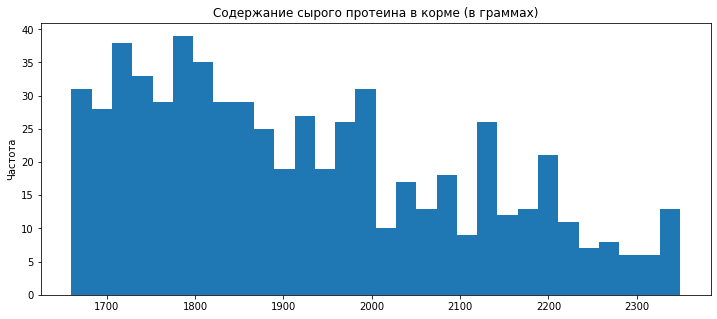

In [25]:
ferma_main['crude_protein'].plot(kind='box', figsize = (12,5))
plt.title('Содержание сырого протеина в корме (в граммах)')
plt.show()
ferma_main['crude_protein'].plot(kind='hist', bins=30, figsize = (12,5))
plt.title('Содержание сырого протеина в корме (в граммах)')
plt.ylabel('Частота')
plt.show()

Данные выглядят корректно, диапазон значений с ~1,65кг до 2,35кг

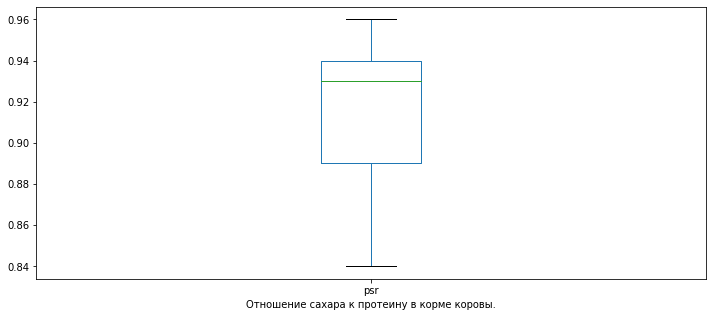

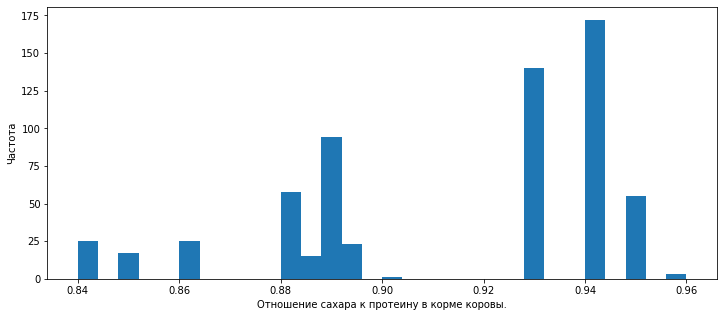

In [26]:
ferma_main['psr'].plot(kind='box', figsize = (12,5))
plt.xlabel('Отношение сахара к протеину в корме коровы.')
plt.show()
ferma_main['psr'].plot(kind='hist', bins=30, figsize = (12,5))
plt.xlabel('Отношение сахара к протеину в корме коровы.')
plt.ylabel('Частота')
plt.show()

Нормального распределения нет, много информации приходят на пиковые значения, самое часто встречаемое значение 0.94

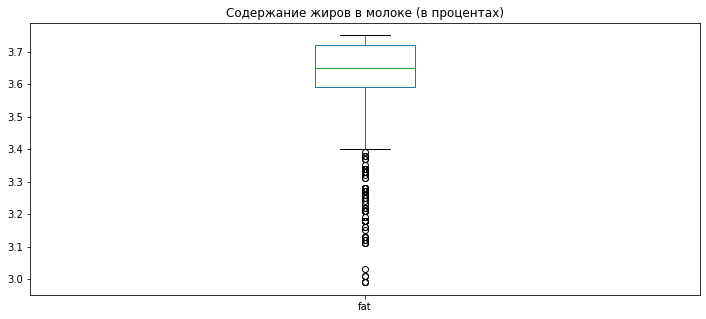

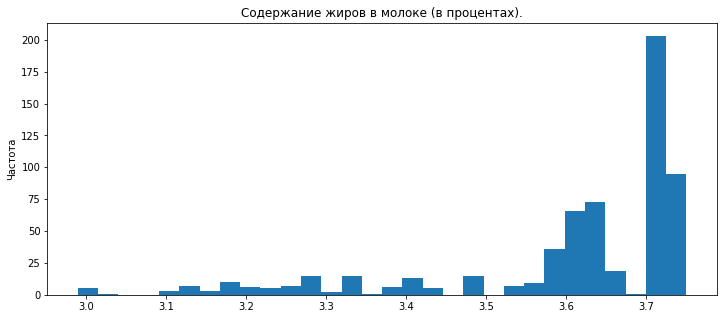

In [27]:
ferma_main['fat'].plot(kind='box', figsize = (12,5))
plt.title('Содержание жиров в молоке (в процентах)')
plt.show()
ferma_main['fat'].plot(kind='hist', bins=30, figsize = (12,5))
plt.title('Содержание жиров в молоке (в процентах).')
plt.ylabel('Частота')
plt.show()

Асимметричное распределение, огромное количество значение на отметке 3.7, значения меньше 3,4 выглядят выбросами

In [28]:
print(f"Выбросы: {(ferma_main['fat'] < 3.4).sum() / len(ferma_main) * 100}")

Выбросы: 13.694267515923567


Таких выбросов в процентах слишком большое количество, очень сильно аномальных значений нет, предлагаю оставить пока как есть

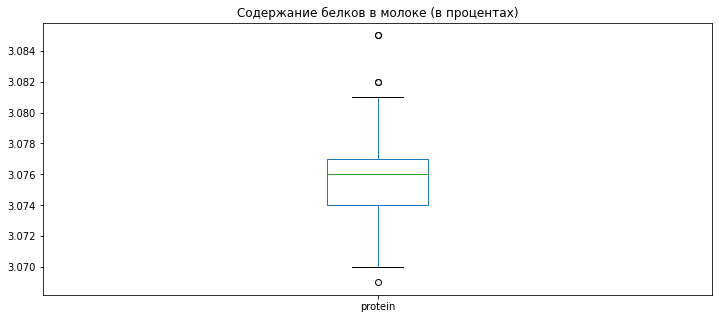

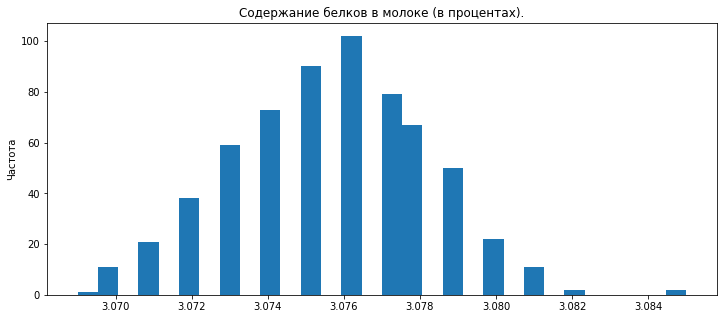

In [29]:
ferma_main['protein'].plot(kind='box', figsize = (12,5))
plt.title('Содержание белков в молоке (в процентах)')
plt.show()
ferma_main['protein'].plot(kind='hist', bins=30, figsize = (12,5))
plt.title('Содержание белков в молоке (в процентах).')
plt.ylabel('Частота')
plt.show()

По боксплоту веднеются 3 выброса, корректировать их не будем, т.к. не являются критичными аномалиями

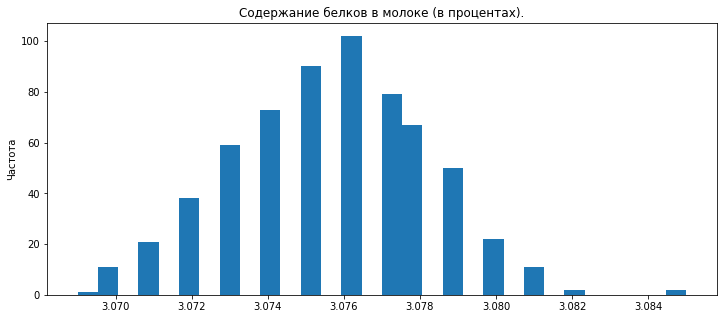

In [30]:
ferma_main['protein'].plot(kind='hist', bins=30, figsize = (12,5))
plt.title('Содержание белков в молоке (в процентах).')
plt.ylabel('Частота')
plt.show()

Данные распределены в диапазоне с 3.071 до 3.08

#### Качественные показатели

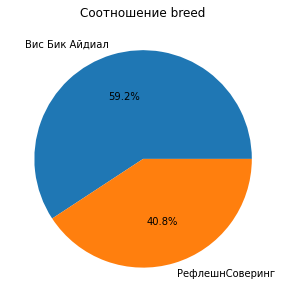

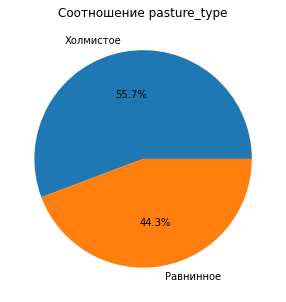

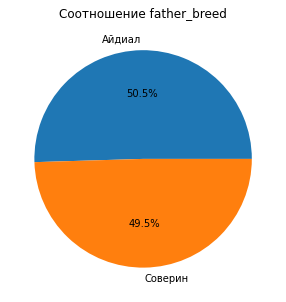

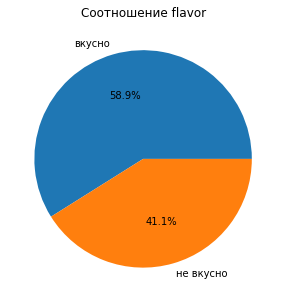

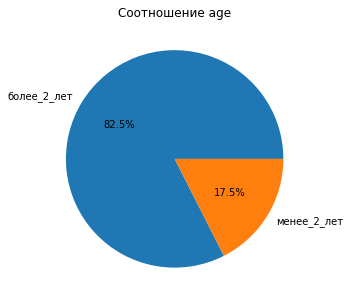

In [31]:
#Посмотрим на категорильные показатели сразу
for col in ['breed', 'pasture_type', 'father_breed', 'flavor', 'age']:
    plt.figure(figsize=(12, 5))
    ferma_main[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Соотношение {col}')
    plt.ylabel('')
    plt.show()

Распределения для признаков породы, типа пастбища, породы папы быка и вкуса близки к соотношениями 50\50. Для категории возраст заметен весомы перекос в сторону коров, которым более 2х лет, на показатель в менее 2х лет приходится ~17%

### Имена пап быков в стаде фермера

In [32]:
ferma_dad.sample(3)

,id,father_name
509,510,Барин
13,14,Буйный
68,69,Соловчик


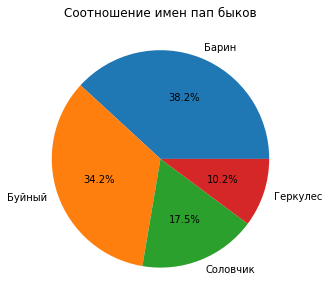

In [33]:
ferma_dad['father_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize = (12,5))
plt.title('Соотношение имен пап быков')
plt.ylabel('')
plt.show()

Для имен пап быков в стаде фермера показатель 'Барин' преобладает, когда 'Геркулес' представлено меньше всего

###  Данные с "ЭкоФермы"

In [34]:
cow_buy.sample(3)

,breed,pasture_type,father_breed,father_name,current_fat,current_protein,age
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
14,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет


In [35]:
cow_buy.describe()

,current_fat,current_protein
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


В данном датафрейме мало данных - всего 16 значений. На первый вгляд аномалий не наблюдается

#### Количественные показатели

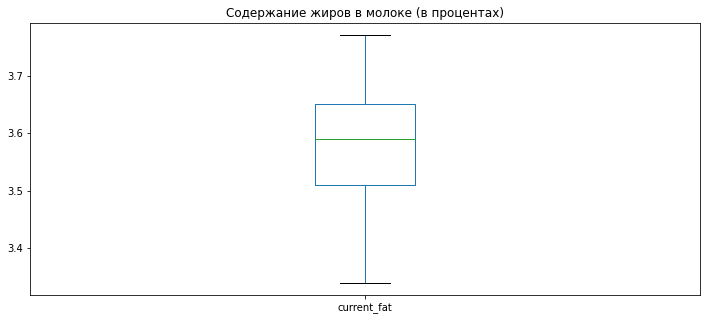

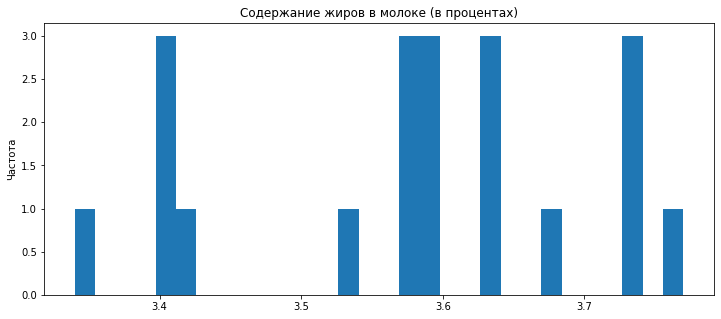

In [36]:
cow_buy['current_fat'].plot(kind='box', figsize = (12,5))
plt.title('Cодержание жиров в молоке (в процентах)')
plt.show()
cow_buy['current_fat'].plot(kind='hist', bins=30, figsize = (12,5))
plt.title('Cодержание жиров в молоке (в процентах)')
plt.ylabel('Частота')
plt.show()

Распределение не выглядит нормальным, но уникальных значений мало, оставляем как есть. Диапазон значений варьируется с ~3.35 до ~3.77

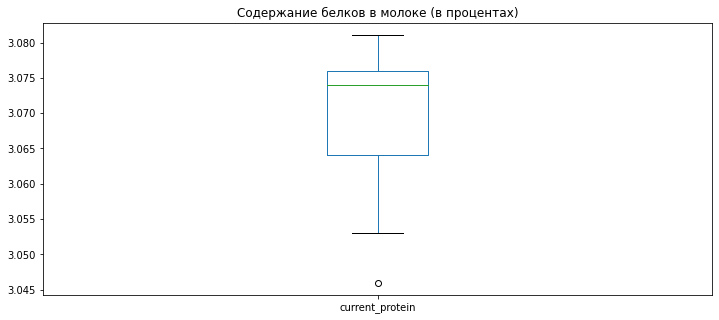

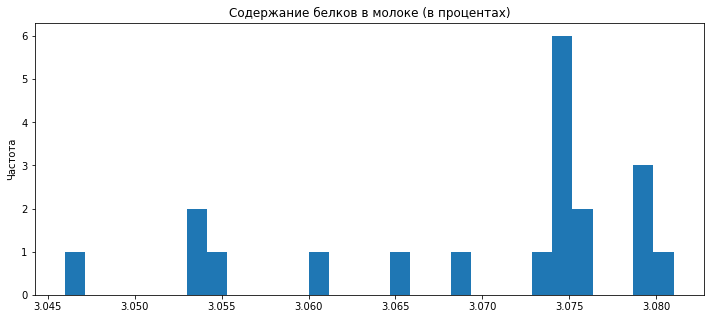

In [37]:
cow_buy['current_protein'].plot(kind='box', figsize = (12,5))
plt.title('Содержание белков в молоке (в процентах)')
plt.show()
cow_buy['current_protein'].plot(kind='hist', bins=30, figsize = (12,5))
plt.title('Содержание белков в молоке (в процентах)')
plt.ylabel('Частота')
plt.show()

Аналогично прошлому значению, т.к. выборка маленькая, данные выглядят приемлемо. Диапазон значений с ~3.04 до ~3.08

#### Качественные показатели

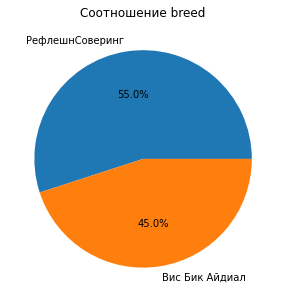

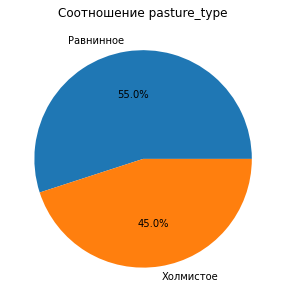

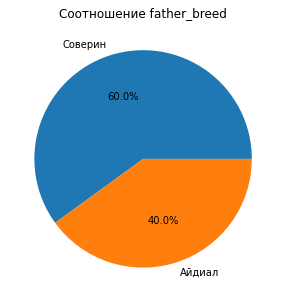

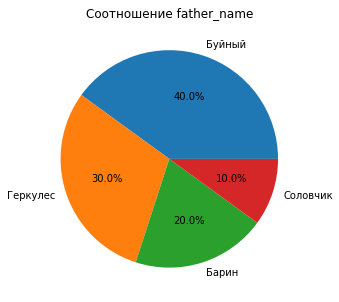

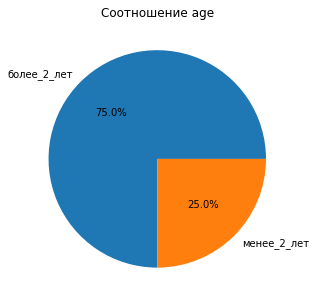

In [38]:
for col in ['breed', 'pasture_type', 'father_breed', 'father_name', 'age']:
    plt.figure(figsize=(12, 5))
    cow_buy[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Соотношение {col}')
    plt.ylabel('')
    plt.show()

Для показателей породы и типа пастбищ данные распределились ровно пополам. Соотношений пород пап быков есть перекос в сторону значения 'Соверин' в 62.5%. Для соотношения в возрасте перекос в сторону коров с возрастом 2 года и более, как и в стате фермера. В именах пап быков преобладает значение 'Буйный', самое минимальное значение и 'Барин' и 'Соловчик'

Итог исследовательского анализа:
- Количественные показатели:
  - в признаке 'удой' удалено аномальное значение 45616
  - в ```ferma_main``` удалено 3 выброса из столбца 'белок'
  - показатели в ```ferma_main``` распределены нормально
  - показатели в ```cow_buy``` скорее в силу малой выборки нельзя назвать нормальным, при этом не имеют выбросов
- Категориальные показатели:
  - во всех датафреймах показатели стремятся к соотношению 50\50, кроме показателя возраста коров и имен отцов.
  - возраст коров имеют ощутимый перевес в стороне коров в возрасте 2 и более года
  - в  ```ferma_dad``` показатель 'Барин' имеет большое значение, а в ```cow_buy``` преобладает 'Буйный'.

## Корреляционный анализ

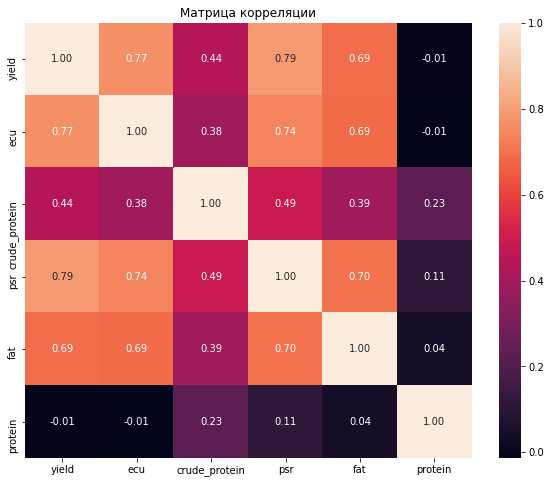

In [39]:
#убираем лишнее
ferma_main_corr_matrix = ferma_main.drop(['index', 'id'], axis=1)

#строим матрицу корреляции
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(ferma_main_corr_matrix.corr(method='spearman'), annot=True, fmt='.2f') 
plt.title("Матрица корреляции")
plt.show()

Нас интересует показатель удоя коров, его и берем за целевой признак при построении взаимосвязей 

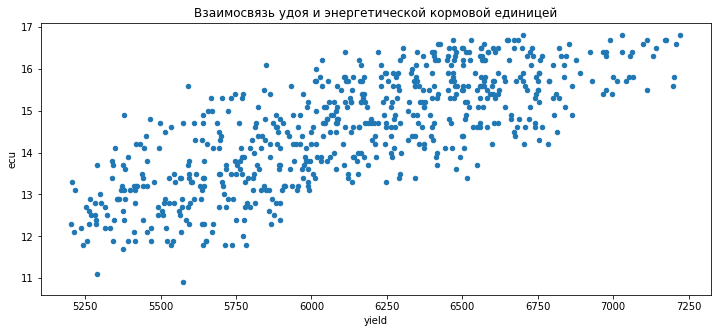

,yield,ecu
yield,1.000000,0.765144
ecu,0.765144,1.000000


In [40]:
ferma_main.plot(kind='scatter', x='yield', y='ecu', figsize = (12,5))
plt.title('Взаимосвязь удоя и энергетической кормовой единицей')
plt.show()
ferma_main[['yield', 'ecu']].corr(method='spearman')

Между показателями удоя и энергетической кормовой единицей сильная положительная связь

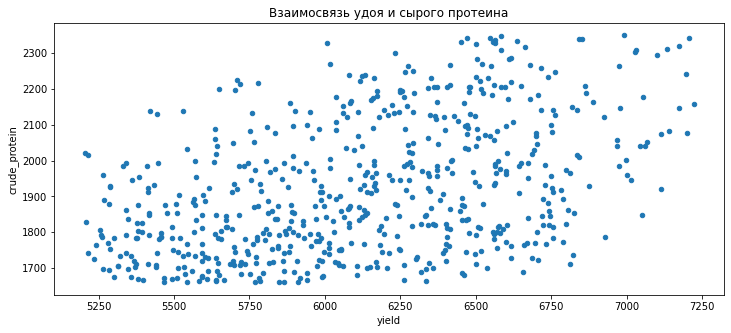

,yield,crude_protein
yield,1.000000,0.437543
crude_protein,0.437543,1.000000


In [41]:
ferma_main.plot(kind='scatter', x='yield', y='crude_protein', figsize=(12, 5))
plt.title('Взаимосвязь удоя и сырого протеина')
plt.show()
ferma_main[['yield', 'crude_protein']].corr(method='spearman')

Между показателями удоя и значениями сырого протеина умеренно-слабая корреляция 

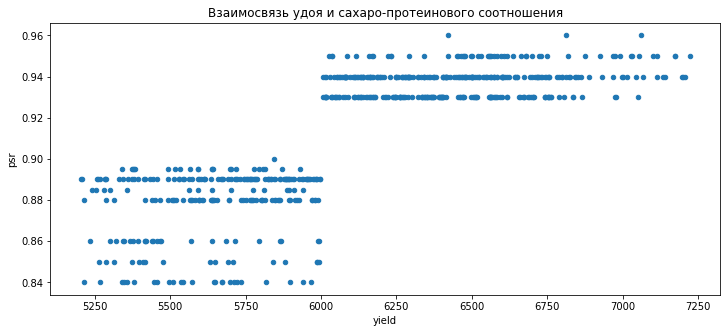

,yield,psr
yield,1.000000,0.787904
psr,0.787904,1.000000


In [42]:
ferma_main.plot(kind='scatter', x='yield', y='psr', figsize = (12,5))
plt.title('Взаимосвязь удоя и сахаро-протеинового соотношения')
plt.show()
ferma_main[['yield', 'psr']].corr(method='spearman')

Уровень удоя и значения сахаро-протеинового соотношения сильная положительная корреляция. Обратим внимание, как соотношение поделилось на два сектора

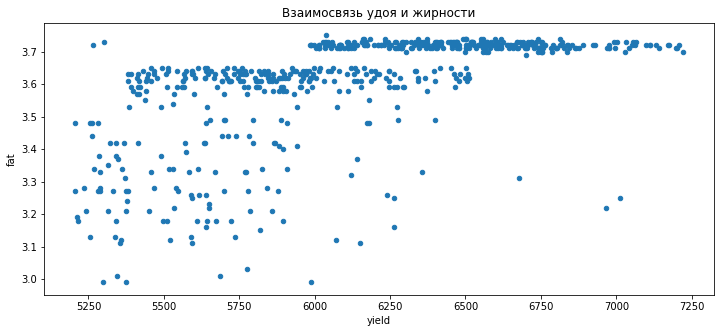

,yield,fat
yield,1.000000,0.688506
fat,0.688506,1.000000


In [43]:
ferma_main.plot(kind='scatter', x='yield', y='fat', figsize = (12,5))
plt.title('Взаимосвязь удоя и жирности')
plt.show()
ferma_main[['yield', 'fat']].corr(method='spearman')

Между показателями удоя и жирности умеренно-положительная корреляция 

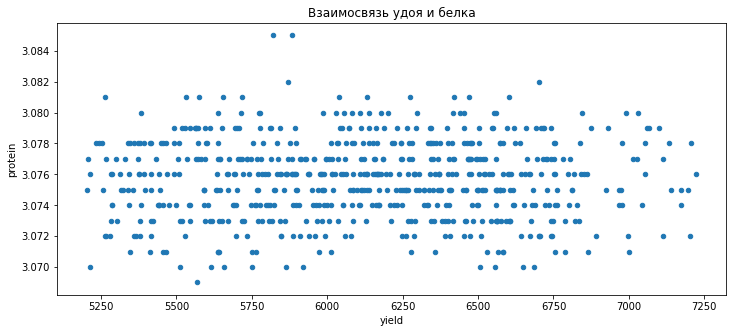

,yield,protein
yield,1.000000,-0.005701
protein,-0.005701,1.000000


In [44]:
ferma_main.plot(kind='scatter', x='yield', y='protein', figsize = (12,5))
plt.title('Взаимосвязь удоя и белка')
plt.show()
ferma_main[['yield', 'protein']].corr(method='spearman')

Показатели удоя никак не коррелируют с показателями белка

Далее посмотрим на диаграммах взаимосвязи с учетом значений категориальных признаков

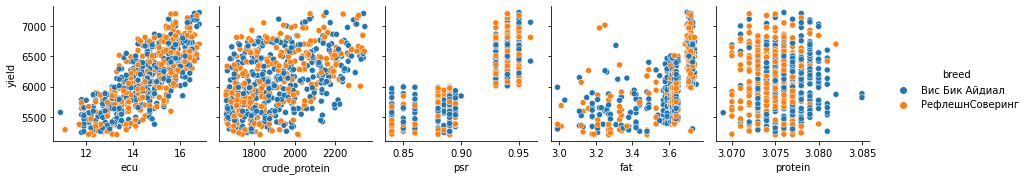

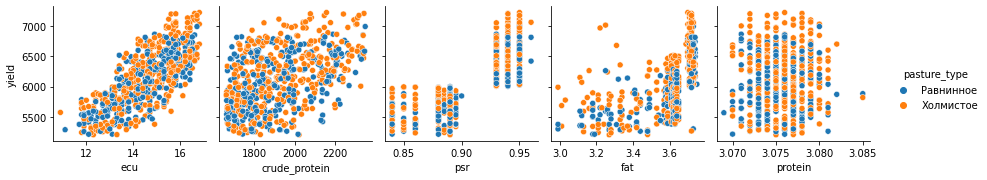

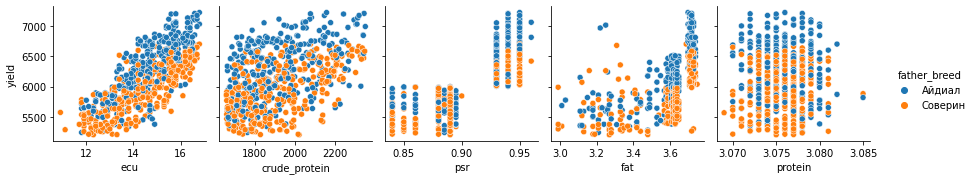

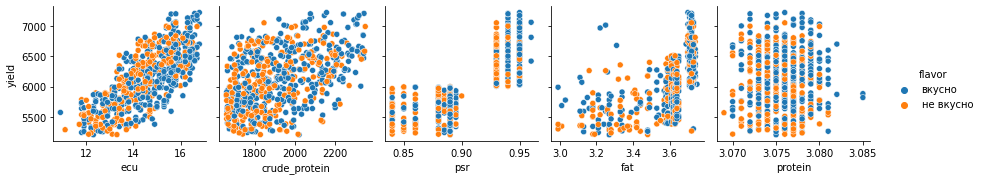

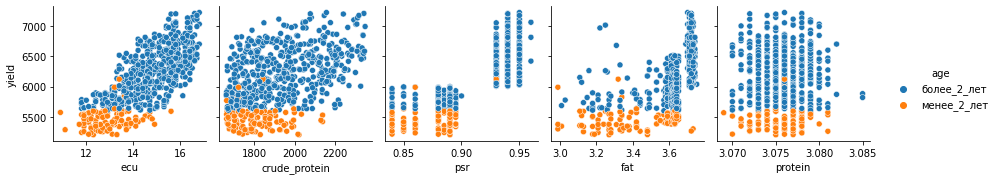

In [45]:
numeric_features = ['ecu', 'crude_protein', 'psr', 'fat', 'protein']
category_features = ['breed', 'pasture_type', 'father_breed', 'flavor', 'age']
for category in category_features:
    sns.pairplot(ferma_main, x_vars=numeric_features, y_vars='yield', hue=category)

Подчеркнем интересные закономерности:
 - показатель возраст самый выбивающийся - независимо от количества признаков, удой будет выше у коров, которым более 2х лет
 - повышенное СПО в питании коров присутствует только для коров старше 2х лет
 - порода папы быка также влияет на удой, выделяется 'Айдиал'

Итог корреляционого анализа для целового показателя:
 - показатель сахаро-протеинового соотношения и энергетическая-кормовая единица показывают самый высокий уровень корреляции
 - для жирности и уровня сырого протеина умеренные уровни корреляции
 - белок не показал взаимосвязи с целевым признаком
 - большинство связей нелинейны
 - для признака сахаро-протеинового соотношения наблюдается интересная взаимосвязь с показателями удоя. Признак поделился на 2  сегемнта, разделенный уровнем ~0.92
 - выделяется показатель возраста коров. Коровы старше 2х лет стабильное дают больше удоя

## Обучение модели линейной регрессии

In [46]:
ferma_main.sample(1)

,index,id,yield,ecu,crude_protein,psr,breed,pasture_type,father_breed,fat,protein,flavor,age
68,68,69,6179,15.2,2122,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.48,3.08,не вкусно,более_2_лет


Наш необходимый признак - удой, он и продолжит выступать целевым признаком. Исходя из корреляционного анализа и логики отфильтруем выборки. Уровень вкуса, белка и жирности больше является характеристиками молока, нежели признаками для удоя, их отсеим.

### Первая модель

R2 LinearRegression = 0.7844078173416967


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


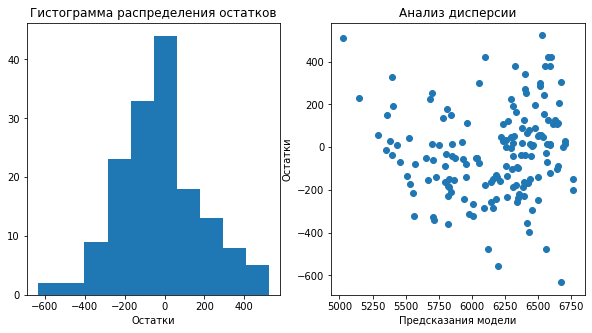

In [47]:
#фильтруем выборки
X = ferma_main.drop(['yield', 'index', 'id', 'protein' , 'fat', 'flavor'], axis=1)
y = ferma_main['yield']

RANDOM_STATE = 42

#Разбиваем на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

#категориальные признаки
cat_names =['breed', 'pasture_type', 'father_breed', 'age']
#количественные признаки
col_names =['ecu', 'crude_protein', 'psr']

#метод кодирования категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_names])
X_test_ohe = encoder.transform(X_test[cat_names])
encoder_col_names = encoder.get_feature_names_out() 

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


#метод масштабирования количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[col_names])
X_test_scaled = scaler.transform(X_test[col_names]) 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

#оцениваем качество модели
pred_1 = model.predict(X_test)
r2_1 = r2_score(y_test, pred_1)
print("R2 LinearRegression =", r2_1)

mse_1 = mean_squared_error(y_test, pred_1)
rmse_1 = mean_squared_error(y_test, pred_1, squared=False)
mae_1 = mean_absolute_error(y_test, pred_1)

#анализируем остатки
residuals = y_test - pred_1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=pred_1, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

R2 для первой модели ~0.78  - неплохой показатель, значит модель хорошо описывает данные в 78% случаев. Ошибки не везде стабильные. На гистограмме есть небольшое отклонение в левую сторону от нуля. Будем улучшать модель

### Вторая модель

Для обучения второй модели изменим признаки. Разделим сахаро-протеиновое соотношение на два сектора больше и меньше 0.92, возведем показатель энерго-кормовой единицы в квадрат, чтобы избежать нелинейности

R2 LinearRegression = 0.8180879926867501


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


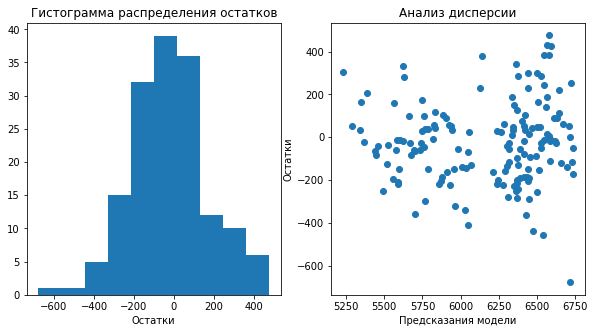

In [48]:
#преобразуем спо в категориальный признак
ferma_main['psr_cat'] = ferma_main['psr'].apply(lambda x: '0' if x<0.92 else '1')

#добавляем признаки
ferma_main['ecu_sq'] = ferma_main['ecu'] **2

#фильтруем выборки
X = ferma_main.drop(['yield', 'index', 'id', 'protein', 'psr', 'ecu', 'fat', 'flavor'], axis=1)
y = ferma_main['yield']

RANDOM_STATE = 42

#Разбиваем на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

#категориальные признаки
cat_names =['breed', 'pasture_type', 'father_breed', 'age', 'psr_cat']
#количественные признаки
col_names =['ecu_sq', 'crude_protein',]

#метод кодирования категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_names])
X_test_ohe = encoder.transform(X_test[cat_names])
encoder_col_names = encoder.get_feature_names_out() 

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


#метод масштабирования количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[col_names])
X_test_scaled = scaler.transform(X_test[col_names]) 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

#оцениваем качество модели
pred_2 = model.predict(X_test)
r2_2 = r2_score(y_test, pred_2)
print("R2 LinearRegression =", r2_2)

mse_2 = mean_squared_error(y_test, pred_2)
rmse_2 = mean_squared_error(y_test, pred_2, squared=False)
mae_2 = mean_absolute_error(y_test, pred_2)

#анализируем остатки
residuals = y_test - pred_2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=pred_2, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Показатель качества модели улучшился, по сравнению с первой моделью. R2 ~0.81 (улучшилась на 0.3). Разброс ошибок стал стальбильнее .Средняя и медиана совпадают, из-за ненормального распределения все еще есть потенциал для улучшения

### Третья модель

Попытаемся улучшить точность нашей модели, добавим новый показатель - имя папы быка из ```ferma_dad```

In [49]:
ferma_main.shape

(628, 15)

In [50]:
ferma_main = ferma_main.merge(ferma_dad, on='id')

#проверим размерность после слияния
print(ferma_main.shape)
ferma_main.sample(1)

(628, 16)


,index,id,yield,ecu,crude_protein,psr,breed,pasture_type,father_breed,fat,protein,flavor,age,psr_cat,ecu_sq,father_name
525,526,527,5734,15.3,1780,0.88,РефлешнСоверинг,Равнинное,Соверин,3.63,3.072,вкусно,более_2_лет,0,234.09,Барин


R2 LinearRegression = 0.8247542745210406


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


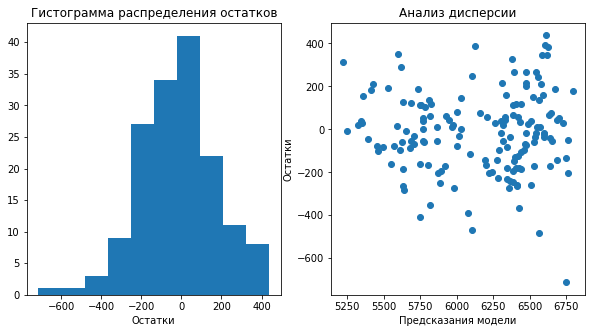

In [51]:
#фильтруем выборки
X = ferma_main.drop(['yield', 'index', 'id', 'protein', 'psr', 'ecu', 'fat', 'flavor'], axis=1)
y = ferma_main['yield']

RANDOM_STATE = 42

#Разбиваем на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

#создадим объединенную тренировочную выборку
X_train_full = pd.concat([X_train, X_test])
y_train_full = pd.concat([y_train, y_test])

#категориальные признаки
cat_names =['breed', 'pasture_type', 'father_breed', 'age', 'psr_cat', 'father_name']
#количественные признаки
col_names =['ecu_sq', 'crude_protein',]


#метод кодирования категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_names])
X_test_ohe = encoder.transform(X_test[cat_names])
encoder_col_names = encoder.get_feature_names_out() 

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


#метод масштабирования количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[col_names])
X_test_scaled = scaler.transform(X_test[col_names]) 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

#оцениваем качество модели
pred_3 = model.predict(X_test)
r2_3 = r2_score(y_test, pred_3)
print("R2 LinearRegression =", r2_3)

mse_3 = mean_squared_error(y_test, pred_3)
rmse_3 = mean_squared_error(y_test, pred_3, squared=False)
mae_3 = mean_absolute_error(y_test, pred_3)

#анализируем остатки
residuals = y_test - pred_3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=pred_3, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Ситуация улучшилась. R2 ~0.82 (увеличилось на ~0.1), средние и медианы примерно совпадают. Дисперсия ошибок стабильная. Модель пригодна для работы

In [52]:
print('Сравнение трех моделей в цифрах:')
print()
print(f"R2 для первой модели {r2_1}")
print(f"R2 для второй модели {r2_2}")
print(f"R2 для третьей модели {r2_3}")
print()
print(f"mse для первой модели {mse_1}")
print(f"mse для второй модели {mse_2}")
print(f"mse для третьей модели {mse_3}")
print()
print(f"rmse для первой модели {rmse_1}")
print(f"rmse для второй модели {rmse_2}")
print(f"rmse для третьей модели {rmse_3}")
print()
print(f"mae для первой модели {mae_1}")
print(f"mae для второй модели {mae_2}")
print(f"mae для третьей модели {mae_3}")

Сравнение трех моделей в цифрах:

R2 для первой модели 0.7844078173416967
R2 для второй модели 0.8180879926867501
R2 для третьей модели 0.8247542745210406

mse для первой модели 43887.015009660514
mse для второй модели 37030.91131113695
mse для третьей модели 35673.88988618195

rmse для первой модели 209.4922791170608
rmse для второй модели 192.43417396901452
rmse для третьей модели 188.8753289505592

mae для первой модели 164.24194463474925
mae для второй модели 149.03965222364602
mae для третьей модели 146.16302445362322


In [53]:
lq = np.quantile(pred_3, 0.025)
uq = np.quantile(pred_3, 0.975)

print(f"Доверительный интервал 95%: {lq} - {uq}")

Доверительный интервал 95%: 5351.318280574307 - 6749.077628641808


Третья модель показала себя лучше всех по всем характеристикам, ее и будем использовать для прогноза

### Прогноз удоя

In [54]:
#создаем копию датасета для прогноза
cow_ml = cow_buy

#считаем среднее значение для новых признаков и берем 105%
values = ferma_main[['ecu', 'crude_protein', 'psr']].mean() * 1.05

#добавляем признаки
cow_ml['ecu'] = values['ecu']
cow_ml['ecu_sq'] = cow_ml['ecu'] ** 2
cow_ml['crude_protein'] = values['crude_protein']
cow_ml['psr'] = values['psr']
cow_ml['psr_cat'] = cow_ml['psr'].apply(lambda x: '1' if x < 0.92 else '0')

#удаляем лишние показатели
cow_ml = cow_ml.drop(['current_fat', 'current_protein', 'ecu', 'psr'], axis=1)

In [55]:
cow_ml.sample(1)

,breed,pasture_type,father_breed,father_name,age,ecu_sq,crude_protein,psr_cat
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,233.361138,2019.947532,0


In [56]:
#категориальные признаки
cat_names =['breed', 'pasture_type', 'father_breed',  'age', 'psr_cat', 'father_name']
#количественные признаки
col_names =['ecu_sq', 'crude_protein',]

#метод кодирования категориальных признаков
X_train_ohe = encoder.transform(X_train_full[cat_names])
X_test_ohe = encoder.transform(cow_ml[cat_names])
encoder_col_names = encoder.get_feature_names_out()

#метод масштабирования количественных признаков
X_train_scaled = scaler.transform(X_train_full[col_names])
X_test_scaled = scaler.transform(cow_ml[col_names])

#собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)


#применяем модель
model.fit(X_train_full, y_train_full)
pred = model.predict(X_test_full)
#добавляем столбец
cow_buy['вероятный_удой'] = pred
cow_more_6k = cow_buy[cow_buy['вероятный_удой'] >= 6000]
cow_more_6k

,breed,pasture_type,father_breed,father_name,current_fat,current_protein,age,ecu,ecu_sq,crude_protein,psr,psr_cat,вероятный_удой
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6207.432853
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6217.419033
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6168.878471
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6207.432853
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6155.609906
11,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6213.023305
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6207.432853
15,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6217.419033
18,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6155.609906
19,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6168.878471


На данном этапе можем порекомендовать 10 буренок, которые потенциально дадут не менее 6к килограммов молока в год

## Обучение модели логистической регрессии

Наш новый признак - вкус. Уберем показатели удоя, сахаро-протеиновые соотношения и кормовые единицы. Добавим столбец с показателем вкуса. Преобразуем столбец с вкусом в категории, где 1 - вкусно, 0 - невкусно

In [57]:
ferma_main['вкус_кат'] = ferma_main['flavor'].apply(lambda x: 1 if x == 'вкусно' else 0)

ferma_main.sample(3)

,index,id,yield,ecu,crude_protein,psr,breed,pasture_type,father_breed,fat,protein,flavor,age,psr_cat,ecu_sq,father_name,вкус_кат
492,493,494,5477,13.3,1854,0.85,Вис Бик Айдиал,Равнинное,Соверин,3.62,3.074,не вкусно,менее_2_лет,0,176.89,Соловчик,0
579,580,581,6097,15.5,2028,0.94,Вис Бик Айдиал,Холмистое,Соверин,3.71,3.075,вкусно,более_2_лет,1,240.25,Барин,1
370,371,372,6592,15.4,1810,0.93,РефлешнСоверинг,Равнинное,Айдиал,3.72,3.073,не вкусно,более_2_лет,1,237.16,Геркулес,0


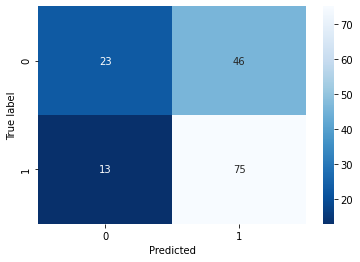

In [58]:
#фильтруем выборки
X = ferma_main.drop(['yield', 'index', 'id', 'psr', 'ecu', 'вкус_кат', 'flavor', 'father_name'], axis=1)
y = ferma_main['вкус_кат']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

#создадим объединенную тренировочную выборку
X_train_full = pd.concat([X_train, X_test])
y_train_full = pd.concat([y_train, y_test])

#категориальные признаки
cat_names = ['breed', 'pasture_type', 'father_breed', 'age', 'psr_cat']
#количественные признаки
col_names = ['fat', 'protein', 'ecu_sq', 'crude_protein']

#метод кодирования категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_names])
X_test_ohe = encoder.transform(X_test[cat_names])
encoder_col_names = encoder.get_feature_names_out()

#метод масштабирования количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[col_names])
X_test_scaled = scaler.transform(X_test[col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#обучаем модель
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#матрица ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

In [59]:
print(f'Accuracy: {accuracy_score(y_pred, y_test)}')
print(f'Recall: {recall_score(y_pred, y_test)}')
print(f'Precision: {precision_score(y_pred, y_test)}')

Accuracy: 0.6242038216560509
Recall: 0.6198347107438017
Precision: 0.8522727272727273


По нашей матрице ошибок видим, что модель делает аж 45 ошибочных прогноза, что молока будет вкусным. Нам важна метрика 'Precision', в идеале, чтобы она была равна 1. Критична ошибка первого порядка, так как нам важно, чтобы корова давала **вкусное** молоко. Нет ничего страшного, если система не порекомендует вкусное молоко, главное, чтобы она не порекомендовала невкусное. 

In [60]:
#проверим вероятности правильных ответов
y_proba = clf.predict_proba(X_test)[:, 1]

proba_data = pd.DataFrame(zip(y_test, y_proba),
                          columns=['y_test', 'y_proba']).sort_values(by='y_proba', ascending=False)

proba_data.head(10)

,y_test,y_proba
85,1,0.839787
66,1,0.836370
110,1,0.830719
51,1,0.824018
146,1,0.821630
136,1,0.807264
8,1,0.803833
147,1,0.795140
54,0,0.794014
108,0,0.792081


In [61]:
thresholds = [round(i, 2) for i in np.linspace(0.1, 1, num=15, endpoint=False)]
columns = []

for i in thresholds:
    columns.append('y_pred_' + str(i))
    proba_data['y_pred_' + str(i)] = proba_data['y_proba'].apply(lambda x: 1 if x > i else 0)

proba_data.head(5)

,y_test,y_proba,y_pred_0.1,y_pred_0.16,y_pred_0.22,y_pred_0.28,y_pred_0.34,y_pred_0.4,y_pred_0.46,y_pred_0.52,y_pred_0.58,y_pred_0.64,y_pred_0.7,y_pred_0.76,y_pred_0.82,y_pred_0.88,y_pred_0.94
85,1,0.839787,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
66,1,0.836370,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
110,1,0.830719,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
51,1,0.824018,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
146,1,0.821630,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


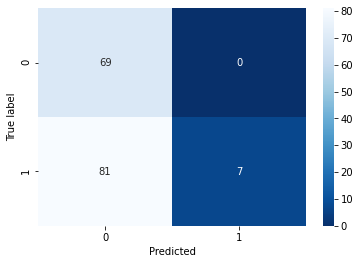

In [62]:
#предпологаем отпимальный порог
threshold = 0.8

#применяем порог
y_pred_threshold = (y_proba > threshold)

cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

In [63]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_threshold)}')
print(f'Recall: {recall_score(y_test, y_pred_threshold)}')
print(f'Precision: {precision_score(y_test, y_pred_threshold)}')

Accuracy: 0.4840764331210191
Recall: 0.07954545454545454
Precision: 1.0


Порог в 0.8 показал себя оптимальным, ошибка первого порядка **исключена**. Показатели accurace и recall заметно упали, но теперь мы точно скажем, что фермер получит буренку с вкусным молоком. Такие показатели дают 100% вероятность, что корова даст вкусное молоко, но есть вероятность, что ни одна корова не будет предложена

In [64]:
cow_buy.sample(3)

,breed,pasture_type,father_breed,father_name,current_fat,current_protein,age,ecu,ecu_sq,crude_protein,psr,psr_cat,вероятный_удой
19,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6168.878471
10,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,5975.626621
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,233.361138,2019.947532,0.958744,0,5995.093114


In [65]:
cow_ml_2 = cow_buy
#добавляем признаки
cow_ml_2['ecu'] = values['ecu']
cow_ml_2['ecu_sq'] = cow_ml_2['ecu'] ** 2
cow_ml_2['crude_protein'] = values['crude_protein']
cow_ml_2['psr'] = values['psr']
cow_ml_2['psr_cat'] = cow_ml_2['psr'].apply(lambda x: '1' if x < 0.92 else '0')

#переименуем признаки и удалим лишнее
cow_ml_2.rename(columns={'current_fat': 'fat', 'current_protein': 'protein'}, inplace=True)
cow_ml_2 = cow_ml_2.drop(['father_name', 'ecu', 'psr'], axis=1) #, 'вероятный_удой'

cow_ml_2.sample(1)

,breed,pasture_type,father_breed,fat,protein,age,ecu_sq,crude_protein,psr_cat,вероятный_удой
3,РефлешнСоверинг,Холмистое,Айдиал,3.4,3.061,более_2_лет,233.361138,2019.947532,0,6217.419033


In [66]:
#категориальные признаки
cat_names = ['breed', 'pasture_type', 'father_breed', 'age', 'psr_cat']
#количественные признаки
col_names = ['fat', 'protein', 'ecu_sq', 'crude_protein']


#метод кодирования категориальных признаков
X_train_ohe = encoder.transform(X_train_full[cat_names])
X_test_ohe = encoder.transform(cow_ml_2[cat_names])
encoder_col_names = encoder.get_feature_names_out()

#метод масштабирования количественных признаков
X_train_scaled = scaler.transform(X_train_full[col_names])
X_test_scaled = scaler.transform(cow_ml_2[col_names])

#собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

#применяем модель
clf.fit(X_train_full, y_train_full)
y_proba = clf.predict_proba(X_test_full)[:, 1]
cow_buy['ожидаемый_вкус_молока'] = (y_proba > threshold)

cow_buy.sample(1)

,breed,pasture_type,father_breed,father_name,fat,protein,age,ecu,ecu_sq,crude_protein,psr,psr_cat,вероятный_удой,ожидаемый_вкус_молока
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,233.361138,2019.947532,0.958744,0,6168.878471,False


In [67]:
#расшифруем вкусы
cow_buy['ожидаемый_вкус_молока'] = cow_buy['ожидаемый_вкус_молока'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
#удалим ненужные категории
cow_buy = cow_buy.drop(['ecu_sq', 'psr_cat'], axis=1)
#вернем датафрейму русский язык
cow_buy.columns = ['Порода', 'Тип пастбища', 'Порода отца быка', 'Имя отца быка', 'Жирность', 
                  'Белок', 'Возраст', 'Энергетическая кормовая единица', 'Сырой протеин', 
                  'Сахаро протеиновое соотношение', 'Вероятный удой', 'Ожидаемый вкус молока']

to_buy = cow_buy[(cow_buy['Ожидаемый вкус молока'] == "вкусно") & (cow_buy['Вероятный удой'] >= 6000)]
to_buy

,Порода,Тип пастбища,Порода отца быка,Имя отца быка,Жирность,Белок,Возраст,Энергетическая кормовая единица,Сырой протеин,Сахаро протеиновое соотношение,Вероятный удой,Ожидаемый вкус молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6207.432853,вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,6207.432853,вкусно


Выбраны **2 коровки**, рекомендуемые для покупки фермеру, согласно его требованиям:
 - Вкусное молоко
 - Урожай молока в год не менее 6 тонн

## Итоговые выводы

Проведена работа с целью анализа данных фермерских хозяйств и составления 2 модели для прогноза:

- Возможный удой коровы
- Вероятность получить вкусное молоко


Выполненная работа на этапе загрузки и предобработки данных:

- Заменены названия столбцов с кириллицы на латиницу и переведены в удобный и единый формат
- В данных дробного формата запятые заменены на точки и переведены в корректный тип
- Удалены очевидный и неявные дубликаты


Исследовательский анализ показал и корреляционный анализ:
- Количественные показатели:
  - Удалено аномальное значения в ```ferma_main``` в графе 'удой' - 45616
  - Убраны 3 выброса в ```ferma_main``` в 'белок' 
  - Показатели в ```ferma_main``` распределены нормально
  - Показатели в ```cow_buy``` скорее в силу малой выборки нельзя назвать нормальным, при этом не имеют выбросов
  - Признака сахаро-протеинового соотношения наблюдается нелинейная взаимосвязь с показателями удоя. Признак поделился на 2 сегмента, разделенный уровнем ~0.92
  - Сахаро-протеинового соотношения и энергетическая-кормовая единица показывают самый высокий уровень корреляции к удою
  - Жирность и уровень сырого протеина имеют умеренные уровни корреляции с удоем
  - Белок никак не коррелирует с уровнем удоя
  
- Категориальные показатели:
  - Во всех датафреймах почти показатели стремятся к соотношению 50\50.
  - Возраст коров имеют ощутимый перевес в стороне коров в возрасте 2 и более года
  - В  ```ferma_dad``` показатель 'Барин' имеет большое значение, а в ```cow_buy``` преобладает 'Буйный'.
  - Выделяется показатель возраста коров. Коровы старше 2х лет стабильное дают больше удоя


Итоги задачи регрессии:
 - Составлена оптимальная модель для прогнозирования удоя, характеристики которой: 
   - mse - 35911.87261146497 
   - R2 - 0.8235851994502607
   - rmse - 189.50428124837964
   - mae - 146.68789808917197

Применив модель было отсеяно 5 коров, неподходящие под требования фермера-заказчика (удой не меньше 6 тонн в год)


Итоги задачи классификации:
 - Составлена модель для прогнозирования вкуса молока, характеристики который:
   - Accuracy - 0.49044585987261147
   - Recall - 0.09090909090909091
   - Precision - 1.0
   
Учтено требование заказчика, в котором выставлено требование в наличии вкусного молока. Максимизирован показатель 'Precision', тем самым значительно уменьшаем вероятность получить ошибку первого порядка и предложить фермеру корову с невкусным молоком

В качестве рекомендаций можно предложить добавлять новые признаки и увеличивать выборку, так можно положительно повлиять на точность модели. Можно с увереннностью сказать, что фермер не получит корову с невкусным молоком. С помощью проделанной работы мы можем **предложить на покупку 2 коровы**.